# ECE C147 Final Project - Evaluating Deep Learning Architectures for EEG Data Classification

- Konstantin Tzantchev (tzantchev@ucla.edu)
- Artin Kim (artinkim@ucla.edu)
- Krystof Latka (latka@ucla.edu)
- Gregor MacDonald (gregormacd6@ucla.edu)

This notebook provides a framework to run the experiments that motivated our final report and were referenced therein. To re-run the experiments below, it is necessary to have this notebook in the root directory of the project repository.

## Dependencies & utility functions

The project utilizes the PyTorch framework. The code to run these experiments uses PyTorch in combination with the OOP paradigm in order to provide a modular framework to easily run different kinds of experiments with minimal code. All of the dependencies are thus taken care of within the project's .py files. To run experiments, it is only necessary to import `train.py`. In addition, we include a utility function that generates plots to visualize training data using `matplotlib.pyplot`.

In [7]:
from train import train
import matplotlib.pyplot as plt

def plot_stats(stats):    
    if stats:
        train_losses = stats["train_losses"]
        val_losses = stats["val_losses"]
        train_accuracies = stats["train_accuracies"]
        val_accuracies = stats["val_accuracies"]

        plt.figure()
        plt.plot(train_losses, label="Average train Loss")
        plt.plot(val_losses, label="Average validation Loss")
        plt.xlabel("Epoch")
        plt.legend()
        plt.show()

        plt.figure()
        plt.plot(train_accuracies, label="Train Accuracy")
        plt.plot(val_accuracies, label="Validation Accuracy")
        plt.xlabel("Epoch")
        plt.legend()
        plt.show()

## Running experiments

To run an experiment, it is sufficient to call the `train` function imported above with a parameter specifying the name of the experiment. It is also possible to specify a device to be used for training, as well as some of the training hyperparameters. Whenever the optimal hyperparameters deviate from the default values set by the `train` function, we provide the values that we found provided the best results. Appropriate data augmentation is automatically applied upon loading the datasets.

### Experiment \#1: Convolutional Neural Network performing 1D convolution

The architecture trained below is a Convolutional Neural Network that peforms 1D convolution on the 22-channel input. The selected hyperparameters used here and in `train.py` yielded the best results when we performed experiments.
More specific details about the architecture and hyperparameters of this model can be found in the corresponding section of `train.py`, as well as in the file `cnn_1d.py`.

Epoch 1/75: 100%|██████████| 119/119 [00:03<00:00, 38.28it/s, loss=1.48]


Epoch 1 - Avg Train Loss: 1.5333
Epoch 1 - Avg Val Loss: 1.3671, Train Accuracy: 34.5770, Val Accuracy: 32.0755


Epoch 2/75: 100%|██████████| 119/119 [00:02<00:00, 50.09it/s, loss=1.39]


Epoch 2 - Avg Train Loss: 1.4324
Epoch 2 - Avg Val Loss: 1.4210, Train Accuracy: 33.2633, Val Accuracy: 32.0755


Epoch 3/75: 100%|██████████| 119/119 [00:02<00:00, 47.78it/s, loss=1.34]


Epoch 3 - Avg Train Loss: 1.3783
Epoch 3 - Avg Val Loss: 1.4363, Train Accuracy: 39.8450, Val Accuracy: 35.8491


Epoch 4/75: 100%|██████████| 119/119 [00:02<00:00, 48.94it/s, loss=1.19]


Epoch 4 - Avg Train Loss: 1.3369
Epoch 4 - Avg Val Loss: 1.3691, Train Accuracy: 45.2312, Val Accuracy: 40.5660


Epoch 5/75: 100%|██████████| 119/119 [00:02<00:00, 49.52it/s, loss=1.27]


Epoch 5 - Avg Train Loss: 1.2801
Epoch 5 - Avg Val Loss: 1.3335, Train Accuracy: 46.2034, Val Accuracy: 44.8113


Epoch 6/75: 100%|██████████| 119/119 [00:02<00:00, 48.91it/s, loss=1.36]


Epoch 6 - Avg Train Loss: 1.2332
Epoch 6 - Avg Val Loss: 1.2668, Train Accuracy: 48.4761, Val Accuracy: 48.1132


Epoch 7/75: 100%|██████████| 119/119 [00:02<00:00, 49.20it/s, loss=1.11] 


Epoch 7 - Avg Train Loss: 1.1912
Epoch 7 - Avg Val Loss: 1.2638, Train Accuracy: 49.4351, Val Accuracy: 49.0566


Epoch 8/75: 100%|██████████| 119/119 [00:02<00:00, 49.28it/s, loss=1.3]  


Epoch 8 - Avg Train Loss: 1.1536
Epoch 8 - Avg Val Loss: 1.1513, Train Accuracy: 56.6999, Val Accuracy: 52.3585


Epoch 9/75: 100%|██████████| 119/119 [00:02<00:00, 49.17it/s, loss=1.15] 


Epoch 9 - Avg Train Loss: 1.1311
Epoch 9 - Avg Val Loss: 1.1723, Train Accuracy: 57.6984, Val Accuracy: 51.8868


Epoch 10/75: 100%|██████████| 119/119 [00:02<00:00, 48.47it/s, loss=1.1]  


Epoch 10 - Avg Train Loss: 1.0883
Epoch 10 - Avg Val Loss: 1.1160, Train Accuracy: 58.1450, Val Accuracy: 55.1887


Epoch 11/75: 100%|██████████| 119/119 [00:02<00:00, 48.55it/s, loss=0.89] 


Epoch 11 - Avg Train Loss: 1.0709
Epoch 11 - Avg Val Loss: 1.1076, Train Accuracy: 58.9201, Val Accuracy: 56.6038


Epoch 12/75: 100%|██████████| 119/119 [00:02<00:00, 49.51it/s, loss=0.979]


Epoch 12 - Avg Train Loss: 1.0348
Epoch 12 - Avg Val Loss: 1.1126, Train Accuracy: 57.9086, Val Accuracy: 53.7736


Epoch 13/75: 100%|██████████| 119/119 [00:02<00:00, 48.74it/s, loss=1.2]  


Epoch 13 - Avg Train Loss: 1.0207
Epoch 13 - Avg Val Loss: 1.0238, Train Accuracy: 60.4309, Val Accuracy: 55.1887


Epoch 14/75: 100%|██████████| 119/119 [00:02<00:00, 50.00it/s, loss=0.982]


Epoch 14 - Avg Train Loss: 0.9864
Epoch 14 - Avg Val Loss: 0.9826, Train Accuracy: 63.3605, Val Accuracy: 58.4906


Epoch 15/75: 100%|██████████| 119/119 [00:02<00:00, 50.84it/s, loss=0.805]


Epoch 15 - Avg Train Loss: 0.9561
Epoch 15 - Avg Val Loss: 0.9869, Train Accuracy: 63.8203, Val Accuracy: 58.0189


Epoch 16/75: 100%|██████████| 119/119 [00:02<00:00, 50.98it/s, loss=0.984]


Epoch 16 - Avg Train Loss: 0.9507
Epoch 16 - Avg Val Loss: 1.0417, Train Accuracy: 62.2701, Val Accuracy: 56.6038


Epoch 17/75: 100%|██████████| 119/119 [00:02<00:00, 51.05it/s, loss=0.876]


Epoch 17 - Avg Train Loss: 0.9254
Epoch 17 - Avg Val Loss: 1.0303, Train Accuracy: 64.2144, Val Accuracy: 58.0189


Epoch 18/75: 100%|██████████| 119/119 [00:02<00:00, 50.97it/s, loss=0.75] 


Epoch 18 - Avg Train Loss: 0.8997
Epoch 18 - Avg Val Loss: 1.0339, Train Accuracy: 64.8187, Val Accuracy: 60.3774


Epoch 19/75: 100%|██████████| 119/119 [00:02<00:00, 51.05it/s, loss=0.958]


Epoch 19 - Avg Train Loss: 0.8895
Epoch 19 - Avg Val Loss: 0.9754, Train Accuracy: 66.7236, Val Accuracy: 61.7925


Epoch 20/75: 100%|██████████| 119/119 [00:02<00:00, 51.04it/s, loss=0.838]


Epoch 20 - Avg Train Loss: 0.8685
Epoch 20 - Avg Val Loss: 0.9340, Train Accuracy: 67.3016, Val Accuracy: 60.8491


Epoch 21/75: 100%|██████████| 119/119 [00:02<00:00, 50.48it/s, loss=0.952]


Epoch 21 - Avg Train Loss: 0.8692
Epoch 21 - Avg Val Loss: 0.9704, Train Accuracy: 66.3163, Val Accuracy: 60.8491


Epoch 22/75: 100%|██████████| 119/119 [00:02<00:00, 48.46it/s, loss=0.675]


Epoch 22 - Avg Train Loss: 0.8257
Epoch 22 - Avg Val Loss: 0.9916, Train Accuracy: 68.8518, Val Accuracy: 62.2642


Epoch 23/75: 100%|██████████| 119/119 [00:02<00:00, 50.87it/s, loss=0.829]


Epoch 23 - Avg Train Loss: 0.8169
Epoch 23 - Avg Val Loss: 0.9522, Train Accuracy: 68.2475, Val Accuracy: 62.2642


Epoch 24/75: 100%|██████████| 119/119 [00:02<00:00, 49.05it/s, loss=1]    


Epoch 24 - Avg Train Loss: 0.7980
Epoch 24 - Avg Val Loss: 0.9396, Train Accuracy: 70.0867, Val Accuracy: 62.2642


Epoch 25/75: 100%|██████████| 119/119 [00:02<00:00, 49.29it/s, loss=0.738]


Epoch 25 - Avg Train Loss: 0.7909
Epoch 25 - Avg Val Loss: 0.9215, Train Accuracy: 70.5859, Val Accuracy: 62.2642


Epoch 26/75: 100%|██████████| 119/119 [00:02<00:00, 48.85it/s, loss=0.896]


Epoch 26 - Avg Train Loss: 0.7729
Epoch 26 - Avg Val Loss: 0.8867, Train Accuracy: 69.3116, Val Accuracy: 63.2075


Epoch 27/75: 100%|██████████| 119/119 [00:02<00:00, 49.94it/s, loss=0.76] 


Epoch 27 - Avg Train Loss: 0.7400
Epoch 27 - Avg Val Loss: 0.8810, Train Accuracy: 71.6369, Val Accuracy: 63.6792


Epoch 28/75: 100%|██████████| 119/119 [00:02<00:00, 49.62it/s, loss=0.925]


Epoch 28 - Avg Train Loss: 0.7430
Epoch 28 - Avg Val Loss: 0.8768, Train Accuracy: 73.2396, Val Accuracy: 65.0943


Epoch 29/75: 100%|██████████| 119/119 [00:02<00:00, 49.88it/s, loss=0.755]


Epoch 29 - Avg Train Loss: 0.7263
Epoch 29 - Avg Val Loss: 0.8556, Train Accuracy: 74.0279, Val Accuracy: 67.4528


Epoch 30/75: 100%|██████████| 119/119 [00:02<00:00, 49.98it/s, loss=0.537]


Epoch 30 - Avg Train Loss: 0.7037
Epoch 30 - Avg Val Loss: 0.8713, Train Accuracy: 75.1971, Val Accuracy: 67.4528


Epoch 31/75: 100%|██████████| 119/119 [00:02<00:00, 50.01it/s, loss=0.687]


Epoch 31 - Avg Train Loss: 0.6914
Epoch 31 - Avg Val Loss: 0.8754, Train Accuracy: 75.3678, Val Accuracy: 67.4528


Epoch 32/75: 100%|██████████| 119/119 [00:02<00:00, 49.87it/s, loss=0.589]


Epoch 32 - Avg Train Loss: 0.6758
Epoch 32 - Avg Val Loss: 0.8096, Train Accuracy: 78.0084, Val Accuracy: 70.7547


Epoch 33/75: 100%|██████████| 119/119 [00:02<00:00, 50.08it/s, loss=0.749]


Epoch 33 - Avg Train Loss: 0.6503
Epoch 33 - Avg Val Loss: 0.8102, Train Accuracy: 78.0347, Val Accuracy: 69.8113


Epoch 34/75: 100%|██████████| 119/119 [00:02<00:00, 49.84it/s, loss=0.561]


Epoch 34 - Avg Train Loss: 0.6417
Epoch 34 - Avg Val Loss: 0.8610, Train Accuracy: 78.1004, Val Accuracy: 67.9245


Epoch 35/75: 100%|██████████| 119/119 [00:02<00:00, 46.95it/s, loss=0.525]


Epoch 35 - Avg Train Loss: 0.6335
Epoch 35 - Avg Val Loss: 0.7954, Train Accuracy: 80.0184, Val Accuracy: 68.8679


Epoch 36/75: 100%|██████████| 119/119 [00:02<00:00, 49.42it/s, loss=0.676]


Epoch 36 - Avg Train Loss: 0.6203
Epoch 36 - Avg Val Loss: 0.7734, Train Accuracy: 79.0068, Val Accuracy: 70.2830


Epoch 37/75: 100%|██████████| 119/119 [00:02<00:00, 49.62it/s, loss=0.533]


Epoch 37 - Avg Train Loss: 0.6002
Epoch 37 - Avg Val Loss: 0.7814, Train Accuracy: 81.1876, Val Accuracy: 69.8113


Epoch 38/75: 100%|██████████| 119/119 [00:02<00:00, 49.51it/s, loss=0.618]


Epoch 38 - Avg Train Loss: 0.5697
Epoch 38 - Avg Val Loss: 0.7444, Train Accuracy: 83.1582, Val Accuracy: 74.0566


Epoch 39/75: 100%|██████████| 119/119 [00:02<00:00, 48.75it/s, loss=0.509]


Epoch 39 - Avg Train Loss: 0.5675
Epoch 39 - Avg Val Loss: 0.7110, Train Accuracy: 84.3668, Val Accuracy: 72.1698


Epoch 40/75: 100%|██████████| 119/119 [00:02<00:00, 49.30it/s, loss=0.476]


Epoch 40 - Avg Train Loss: 0.5444
Epoch 40 - Avg Val Loss: 0.7146, Train Accuracy: 85.2733, Val Accuracy: 73.1132


Epoch 41/75: 100%|██████████| 119/119 [00:02<00:00, 49.32it/s, loss=0.477]


Epoch 41 - Avg Train Loss: 0.5417
Epoch 41 - Avg Val Loss: 0.7520, Train Accuracy: 84.4456, Val Accuracy: 72.1698


Epoch 42/75: 100%|██████████| 119/119 [00:02<00:00, 49.90it/s, loss=0.487]


Epoch 42 - Avg Train Loss: 0.5114
Epoch 42 - Avg Val Loss: 0.7157, Train Accuracy: 85.0762, Val Accuracy: 73.1132


Epoch 43/75: 100%|██████████| 119/119 [00:02<00:00, 49.62it/s, loss=0.501]


Epoch 43 - Avg Train Loss: 0.4998
Epoch 43 - Avg Val Loss: 0.7454, Train Accuracy: 86.6789, Val Accuracy: 74.0566


Epoch 44/75: 100%|██████████| 119/119 [00:02<00:00, 49.14it/s, loss=0.511]


Epoch 44 - Avg Train Loss: 0.4796
Epoch 44 - Avg Val Loss: 0.6903, Train Accuracy: 89.0830, Val Accuracy: 73.1132


Epoch 45/75: 100%|██████████| 119/119 [00:02<00:00, 49.78it/s, loss=0.402]


Epoch 45 - Avg Train Loss: 0.4744
Epoch 45 - Avg Val Loss: 0.7515, Train Accuracy: 88.9122, Val Accuracy: 72.1698


Epoch 46/75: 100%|██████████| 119/119 [00:02<00:00, 47.62it/s, loss=0.21] 


Epoch 46 - Avg Train Loss: 0.4536
Epoch 46 - Avg Val Loss: 0.6984, Train Accuracy: 90.5413, Val Accuracy: 72.6415


Epoch 47/75: 100%|██████████| 119/119 [00:02<00:00, 49.51it/s, loss=0.585]


Epoch 47 - Avg Train Loss: 0.4446
Epoch 47 - Avg Val Loss: 0.7087, Train Accuracy: 89.8975, Val Accuracy: 73.5849


Epoch 48/75: 100%|██████████| 119/119 [00:02<00:00, 49.45it/s, loss=0.381]


Epoch 48 - Avg Train Loss: 0.4312
Epoch 48 - Avg Val Loss: 0.6819, Train Accuracy: 90.6201, Val Accuracy: 75.9434


Epoch 49/75: 100%|██████████| 119/119 [00:02<00:00, 49.10it/s, loss=0.37] 


Epoch 49 - Avg Train Loss: 0.4110
Epoch 49 - Avg Val Loss: 0.6710, Train Accuracy: 92.4987, Val Accuracy: 75.9434


Epoch 50/75: 100%|██████████| 119/119 [00:02<00:00, 49.11it/s, loss=0.524]


Epoch 50 - Avg Train Loss: 0.4079
Epoch 50 - Avg Val Loss: 0.6414, Train Accuracy: 93.6416, Val Accuracy: 75.9434


Epoch 51/75: 100%|██████████| 119/119 [00:02<00:00, 49.45it/s, loss=0.335]


Epoch 51 - Avg Train Loss: 0.3975
Epoch 51 - Avg Val Loss: 0.6933, Train Accuracy: 93.0242, Val Accuracy: 75.4717


Epoch 52/75: 100%|██████████| 119/119 [00:02<00:00, 49.62it/s, loss=0.342]


Epoch 52 - Avg Train Loss: 0.3906
Epoch 52 - Avg Val Loss: 0.6937, Train Accuracy: 94.1540, Val Accuracy: 74.0566


Epoch 53/75: 100%|██████████| 119/119 [00:02<00:00, 49.56it/s, loss=0.325]


Epoch 53 - Avg Train Loss: 0.3786
Epoch 53 - Avg Val Loss: 0.6655, Train Accuracy: 94.7583, Val Accuracy: 75.9434


Epoch 54/75: 100%|██████████| 119/119 [00:02<00:00, 48.66it/s, loss=0.371]


Epoch 54 - Avg Train Loss: 0.3639
Epoch 54 - Avg Val Loss: 0.6703, Train Accuracy: 95.8487, Val Accuracy: 75.9434


Epoch 55/75: 100%|██████████| 119/119 [00:02<00:00, 49.46it/s, loss=0.295]


Epoch 55 - Avg Train Loss: 0.3428
Epoch 55 - Avg Val Loss: 0.6888, Train Accuracy: 95.0736, Val Accuracy: 76.4151


Epoch 56/75: 100%|██████████| 119/119 [00:02<00:00, 50.82it/s, loss=0.334]


Epoch 56 - Avg Train Loss: 0.3380
Epoch 56 - Avg Val Loss: 0.6623, Train Accuracy: 96.5449, Val Accuracy: 76.8868


Epoch 57/75: 100%|██████████| 119/119 [00:02<00:00, 44.95it/s, loss=0.3]  


Epoch 57 - Avg Train Loss: 0.3281
Epoch 57 - Avg Val Loss: 0.7722, Train Accuracy: 95.9932, Val Accuracy: 74.5283


Epoch 58/75: 100%|██████████| 119/119 [00:02<00:00, 41.96it/s, loss=0.321]


Epoch 58 - Avg Train Loss: 0.3297
Epoch 58 - Avg Val Loss: 0.6981, Train Accuracy: 97.9375, Val Accuracy: 76.8868


Epoch 59/75: 100%|██████████| 119/119 [00:02<00:00, 40.58it/s, loss=0.316]


Epoch 59 - Avg Train Loss: 0.3193
Epoch 59 - Avg Val Loss: 0.6732, Train Accuracy: 97.5696, Val Accuracy: 75.4717


Epoch 60/75: 100%|██████████| 119/119 [00:02<00:00, 47.22it/s, loss=0.263]


Epoch 60 - Avg Train Loss: 0.3094
Epoch 60 - Avg Val Loss: 0.6666, Train Accuracy: 97.8324, Val Accuracy: 78.7736


Epoch 61/75: 100%|██████████| 119/119 [00:02<00:00, 47.65it/s, loss=0.325]


Epoch 61 - Avg Train Loss: 0.3046
Epoch 61 - Avg Val Loss: 0.6313, Train Accuracy: 98.2265, Val Accuracy: 77.3585


Epoch 62/75: 100%|██████████| 119/119 [00:02<00:00, 46.00it/s, loss=0.299]


Epoch 62 - Avg Train Loss: 0.2797
Epoch 62 - Avg Val Loss: 0.6453, Train Accuracy: 98.8702, Val Accuracy: 74.5283


Epoch 63/75: 100%|██████████| 119/119 [00:02<00:00, 46.31it/s, loss=0.181]


Epoch 63 - Avg Train Loss: 0.2955
Epoch 63 - Avg Val Loss: 0.6750, Train Accuracy: 98.7651, Val Accuracy: 74.5283


Epoch 64/75: 100%|██████████| 119/119 [00:02<00:00, 50.29it/s, loss=0.379]


Epoch 64 - Avg Train Loss: 0.2787
Epoch 64 - Avg Val Loss: 0.6562, Train Accuracy: 99.0804, Val Accuracy: 77.3585


Epoch 65/75: 100%|██████████| 119/119 [00:02<00:00, 48.68it/s, loss=0.259]


Epoch 65 - Avg Train Loss: 0.2747
Epoch 65 - Avg Val Loss: 0.6585, Train Accuracy: 98.8833, Val Accuracy: 76.4151


Epoch 66/75: 100%|██████████| 119/119 [00:02<00:00, 49.31it/s, loss=0.256]


Epoch 66 - Avg Train Loss: 0.2717
Epoch 66 - Avg Val Loss: 0.6566, Train Accuracy: 98.9228, Val Accuracy: 75.4717


Epoch 67/75: 100%|██████████| 119/119 [00:02<00:00, 48.10it/s, loss=0.191]


Epoch 67 - Avg Train Loss: 0.2558
Epoch 67 - Avg Val Loss: 0.7037, Train Accuracy: 99.1986, Val Accuracy: 75.9434


Epoch 68/75: 100%|██████████| 119/119 [00:02<00:00, 49.54it/s, loss=0.196]


Epoch 68 - Avg Train Loss: 0.2525
Epoch 68 - Avg Val Loss: 0.6591, Train Accuracy: 99.3431, Val Accuracy: 76.4151


Epoch 69/75: 100%|██████████| 119/119 [00:02<00:00, 49.32it/s, loss=0.173]


Epoch 69 - Avg Train Loss: 0.2555
Epoch 69 - Avg Val Loss: 0.7154, Train Accuracy: 99.1724, Val Accuracy: 75.9434


Epoch 70/75: 100%|██████████| 119/119 [00:02<00:00, 49.53it/s, loss=0.329]


Epoch 70 - Avg Train Loss: 0.2429
Epoch 70 - Avg Val Loss: 0.7240, Train Accuracy: 99.1986, Val Accuracy: 74.5283


Epoch 71/75: 100%|██████████| 119/119 [00:02<00:00, 49.42it/s, loss=0.257]


Epoch 71 - Avg Train Loss: 0.2358
Epoch 71 - Avg Val Loss: 0.6807, Train Accuracy: 99.3300, Val Accuracy: 75.4717


Epoch 72/75: 100%|██████████| 119/119 [00:02<00:00, 49.65it/s, loss=0.354]


Epoch 72 - Avg Train Loss: 0.2272
Epoch 72 - Avg Val Loss: 0.6569, Train Accuracy: 99.5927, Val Accuracy: 77.8302


Epoch 73/75: 100%|██████████| 119/119 [00:02<00:00, 49.45it/s, loss=0.111]


Epoch 73 - Avg Train Loss: 0.2372
Epoch 73 - Avg Val Loss: 0.6655, Train Accuracy: 99.6453, Val Accuracy: 78.3019


Epoch 74/75: 100%|██████████| 119/119 [00:02<00:00, 49.37it/s, loss=0.166]


Epoch 74 - Avg Train Loss: 0.2132
Epoch 74 - Avg Val Loss: 0.6817, Train Accuracy: 99.7373, Val Accuracy: 77.8302


Epoch 75/75: 100%|██████████| 119/119 [00:02<00:00, 49.49it/s, loss=0.137] 


Epoch 75 - Avg Train Loss: 0.2253
Epoch 75 - Avg Val Loss: 0.6261, Train Accuracy: 99.7504, Val Accuracy: 77.3585
Test accuracy: 70.20%


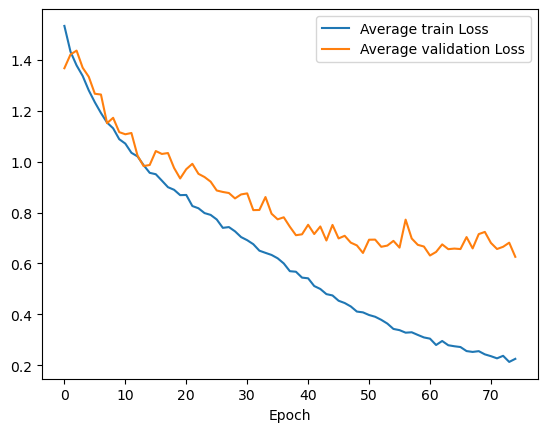

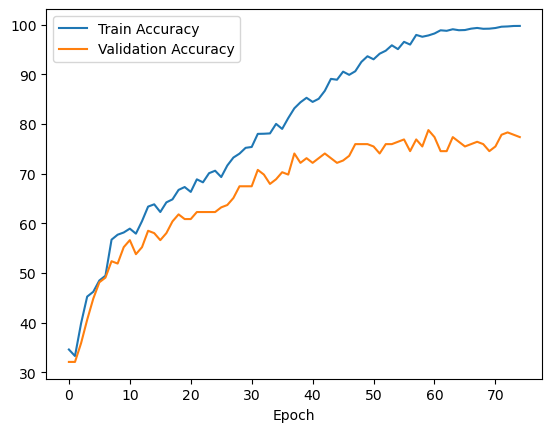

In [8]:
cnn_stats = train(
    experiment_name="cnn_1d",
    num_epochs=75,
    batch_size=64,
    lr=1e-4,
    device='mps',
    wandb_track=False
)
plot_stats(cnn_stats)

### Experiment \#2: Mamba

The architecture initialized below is Mamba, which was the main focus of our project. The selected hyperparameters used here and in `train.py` yielded the best results when we performed experiments. Note that we did not actually run the training loop here, because setting up a Jupyter notebook to run on CUDA was unnecessarily complex. However, it serves as an example of how to run the training function. You can also recreate our results by running the python script `train.py` that has a command-line interface.

In [ ]:
mamba_stats = train(
    experiment_name="mamba",
    num_epochs=80,
    batch_size=512,
    lr=1e-3,
    device='cuda',
    wandb_track=False
)
plot_stats(mamba_stats)